<a href="https://colab.research.google.com/github/yul77/hmkd1-2023/blob/main/%ED%94%84%EC%A0%9D_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%9E%91%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# csv기반 데이터 가공

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 경로
ori_df= '/content/drive/MyDrive/2차 프로젝트/FORML.xlsx'

# CSV 파일 열기
df = pd.read_excel(ori_df)
df.head(3)



,RN,WEEK,PRODNAME,TEM_AVG,HUM_AVG,ORDER_QUANT,SOLD_QUANT,미분양주택현황,국내건설수주액,국내건설기성액
0,1,2018-11-05,AE,9.23,70.49,13830,14560,60122,11924951,11419899
1,1,2018-11-05,CSA4000,9.23,70.49,15764,12480,60122,11924951,11419899
2,1,2018-11-05,CSA5000,9.23,70.49,112083,118560,60122,11924951,11419899


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   RN           2336 non-null   int64         
 1   WEEK         2336 non-null   datetime64[ns]
 2   PRODNAME     2336 non-null   object        
 3   TEM_AVG      2336 non-null   float64       
 4   HUM_AVG      2336 non-null   float64       
 5   ORDER_QUANT  2336 non-null   int64         
 6   SOLD_QUANT   2336 non-null   int64         
 7   미분양주택현황      2336 non-null   int64         
 8   국내건설수주액      2336 non-null   int64         
 9   국내건설기성액      2336 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 182.6+ KB


In [4]:
df.describe()

,RN,TEM_AVG,HUM_AVG,ORDER_QUANT,SOLD_QUANT,미분양주택현황,국내건설수주액,국내건설기성액
count,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2.336000e+03,2.336000e+03
mean,64.965753,10.058506,63.035539,80268.554366,79667.815497,42613.036815,1.437222e+07,1.156917e+07
std,37.209456,3.710635,3.986457,125107.293005,124296.060006,17254.542739,5.098854e+06,1.409642e+06
min,1.000000,1.390000,55.050000,1147.000000,1280.000000,15270.000000,7.769343e+06,9.346282e+06
25%,33.000000,8.590000,60.660000,9768.250000,10000.000000,28309.000000,1.078058e+07,1.058902e+07
50%,65.000000,11.770000,64.340000,30554.500000,30080.000000,43268.000000,1.375280e+07,1.142431e+07
75%,97.000000,12.680000,66.480000,87819.750000,87725.000000,60062.000000,1.625224e+07,1.214510e+07
max,129.000000,13.410000,70.490000,728063.000000,722769.000000,63705.000000,2.921873e+07,1.497443e+07


In [5]:
df.nunique()

RN              129
WEEK            129
PRODNAME         27
TEM_AVG         112
HUM_AVG         119
ORDER_QUANT    2301
SOLD_QUANT     1273
미분양주택현황          30
국내건설수주액          30
국내건설기성액          30
dtype: int64

In [6]:
#데이터 세트의 전체 크기와 칼럼의 타입, null이 있는 칼럼과 그 건수를 내림차순으로 출력

print(' 데이터세트의 shape: ',df.shape)
print('\n 전체 피쳐의 타입 \n:', df.dtypes.value_counts())
isnull_series = df.isnull().sum()
print('\n null 칼럼과 그 건수: \n',isnull_series[isnull_series>0].sort_values(ascending = False))

 데이터세트의 shape:  (2336, 10)

 전체 피쳐의 타입 
: int64             6
float64           2
datetime64[ns]    1
object            1
dtype: int64

 null 칼럼과 그 건수: 
 Series([], dtype: int64)


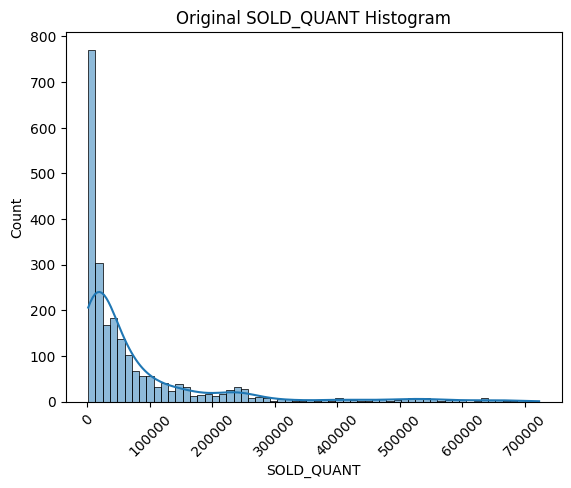

In [7]:
# 정규분포인지 확인
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Original SOLD_QUANT Histogram')
plt.xticks(rotation=45)
sns.histplot(df['SOLD_QUANT'], kde=True)
plt.show()

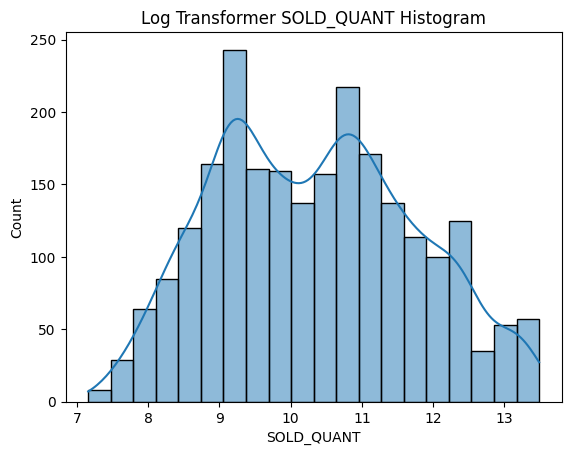

In [8]:
# 로그변환 해서 다시 보기

plt.title('Log Transformer SOLD_QUANT Histogram')
log_SOLD_QUANT = np.log1p(df['SOLD_QUANT'])
sns.histplot(log_SOLD_QUANT, kde=True)
plt.show()

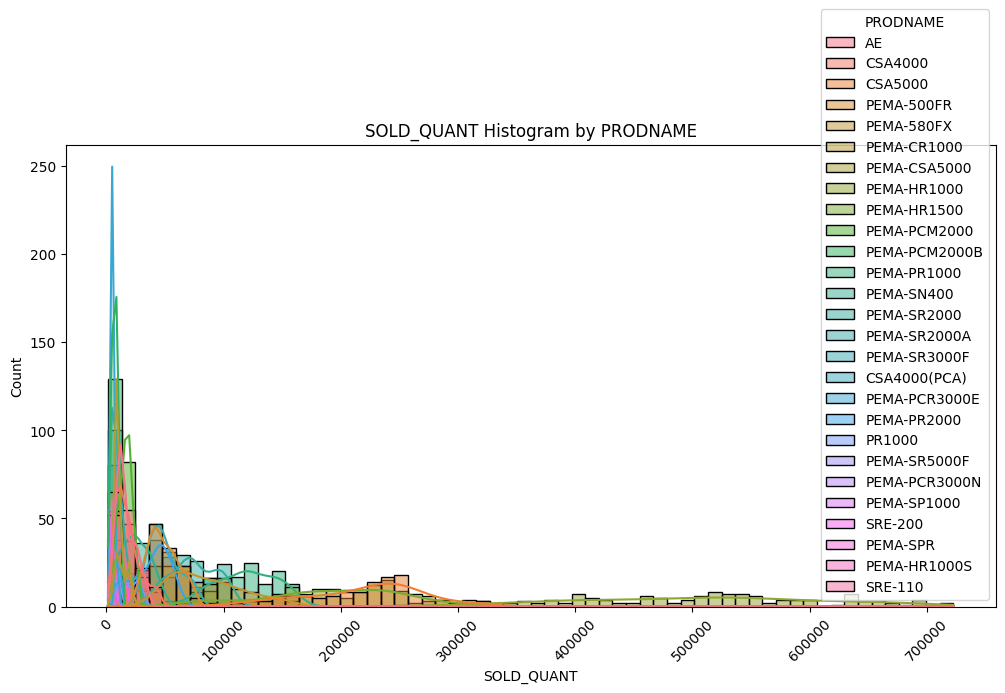

In [9]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(12, 6))  # 그래프 크기 조정

plt.title('SOLD_QUANT Histogram by PRODNAME')
plt.xticks(rotation=45)
sns.histplot(data=df, x='SOLD_QUANT', kde=True, hue='PRODNAME')
plt.show()


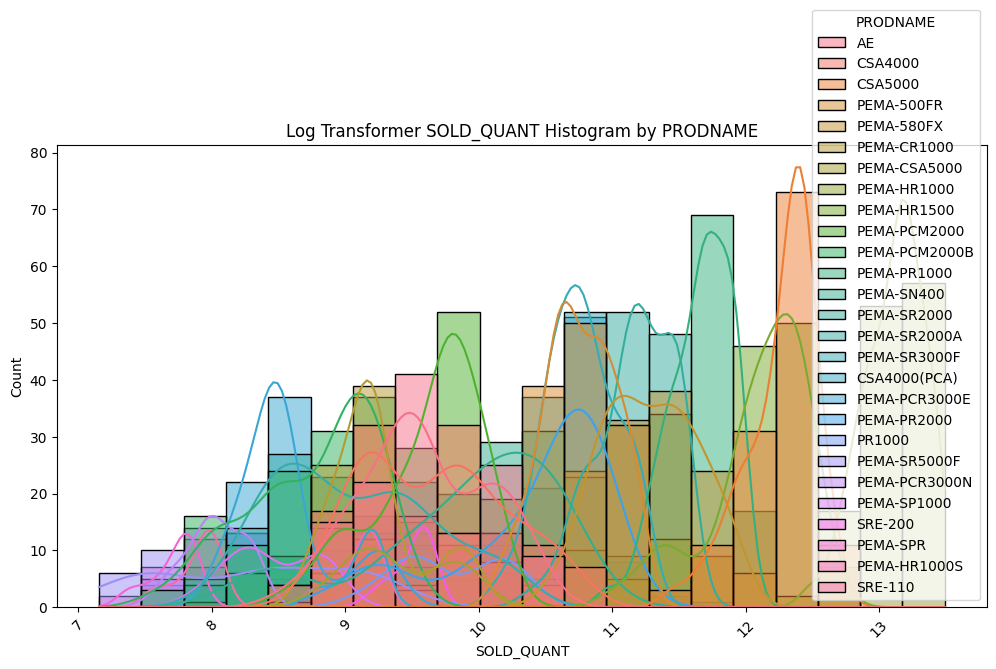

In [10]:
plt.figure(figsize=(12, 6))  # 그래프 크기 조정

# 로그 변환한 히스토그램
plt.title('Log Transformer SOLD_QUANT Histogram by PRODNAME')
plt.xticks(rotation=45)
log_SOLD_QUANT = np.log1p(df['SOLD_QUANT'])
sns.histplot(data=df, x=log_SOLD_QUANT, kde=True, hue='PRODNAME')
plt.show()

In [11]:
# SalePrice 로그 변환
ori_SOLD_QUANT= df['SOLD_QUANT']
df['SOLD_QUANT'] = np.log1p(df['SOLD_QUANT'])

# Null 이 너무 많은 컬럼들과 불필요한 컬럼 삭제
df.drop(['RN'], axis=1 , inplace=True)
# Drop 하지 않는 숫자형 Null컬럼들은 평균값으로 대체
df.fillna(df.mean(),inplace=True)

# Null 값이 있는 피처명과 타입을 추출
null_column_count = df.isnull().sum()[df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', df.dtypes[null_column_count.index])


## Null 피처의 Type :
 Series([], dtype: object)


In [12]:
df

,WEEK,PRODNAME,TEM_AVG,HUM_AVG,ORDER_QUANT,SOLD_QUANT,미분양주택현황,국내건설수주액,국내건설기성액
0,2018-11-05,AE,9.23,70.49,13830,9.586102,60122,11924951,11419899
1,2018-11-05,CSA4000,9.23,70.49,15764,9.431963,60122,11924951,11419899
2,2018-11-05,CSA5000,9.23,70.49,112083,11.683183,60122,11924951,11419899
3,2018-11-05,PEMA-500FR,9.23,70.49,36817,10.635879,60122,11924951,11419899
4,2018-11-05,PEMA-580FX,9.23,70.49,70073,11.389639,60122,11924951,11419899
...,...,...,...,...,...,...,...,...,...
2331,2021-04-19,PEMA-PR2000,11.81,66.22,60579,10.915107,15798,17774868,11514860
2332,2021-04-19,PEMA-SN400,11.81,66.22,37924,10.463132,15798,17774868,11514860
2333,2021-04-19,PEMA-SR2000,11.81,66.22,87990,11.338584,15798,17774868,11514860
2334,2021-04-19,PEMA-SR2000A,11.81,66.22,9818,9.392745,15798,17774868,11514860


In [13]:
# 원핫인코딩 진행

print('get_dummies() 수행 전 데이터 Shape:', df.shape)
df_ohe = pd.get_dummies(df)
print('get_dummies() 수행 후 데이터 Shape:', df_ohe.shape)

null_column_count = df_ohe.isnull().sum()[df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape: (2336, 9)
get_dummies() 수행 후 데이터 Shape: (2336, 35)
## Null 피처의 Type :
 Series([], dtype: object)


In [14]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

데이터 타입 확인: df_ohe의 각 열(Column)의 데이터 타입을 확인합니다. 다음과 같이 코드를 작성하여 각 열의 데이터 타입을 출력합니다:

In [15]:
print(df_ohe.dtypes)

WEEK                      datetime64[ns]
TEM_AVG                          float64
HUM_AVG                          float64
ORDER_QUANT                        int64
SOLD_QUANT                       float64
미분양주택현황                            int64
국내건설수주액                            int64
국내건설기성액                            int64
PRODNAME_AE                        uint8
PRODNAME_CSA4000                   uint8
PRODNAME_CSA4000(PCA)              uint8
PRODNAME_CSA5000                   uint8
PRODNAME_PEMA-500FR                uint8
PRODNAME_PEMA-580FX                uint8
PRODNAME_PEMA-CR1000               uint8
PRODNAME_PEMA-CSA5000              uint8
PRODNAME_PEMA-HR1000               uint8
PRODNAME_PEMA-HR1000S              uint8
PRODNAME_PEMA-HR1500               uint8
PRODNAME_PEMA-PCM2000              uint8
PRODNAME_PEMA-PCM2000B             uint8
PRODNAME_PEMA-PCR3000E             uint8
PRODNAME_PEMA-PCR3000N             uint8
PRODNAME_PEMA-PR1000               uint8
PRODNAME_PEMA-PR

각 열(Column)의 데이터 타입 정보를 살펴보면, 'WEEK' 열이 datetime64[ns], 'SOLD_QUANT' 열이 float64로 되어 있습니다.

에러 메시지에서 언급된 오류는 datetime64[ns]와 float64 데이터 타입의 호환성 문제로 인해 발생한 것으로 보입니다. 이 문제를 해결하려면 'WEEK' 열의 데이터 타입을 datetime64에서 숫자형(float 또는 int)으로 변환해주어야 합니다.

데이터프레임에서 pd.to_numeric() 함수를 사용하여 숫자형으로 변환할 수 있습니다. 'WEEK' 열의 데이터를 숫자형으로 변환하는 코드는 다음과 같이 작성할 수 있습니다:

In [16]:
df_ohe['WEEK'] = pd.to_numeric(df_ohe['WEEK'], errors='coerce')

In [17]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = df_ohe['SOLD_QUANT']
X_features = df_ohe.drop('SOLD_QUANT',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.826
Ridge 로그 변환된 RMSE: 0.368
Lasso 로그 변환된 RMSE: 0.826


[0.8260423904935422, 0.36821252517432823, 0.826039850593102]

In [18]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명.
    coef = pd.Series(model.coef_, index=X_features.columns)

    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

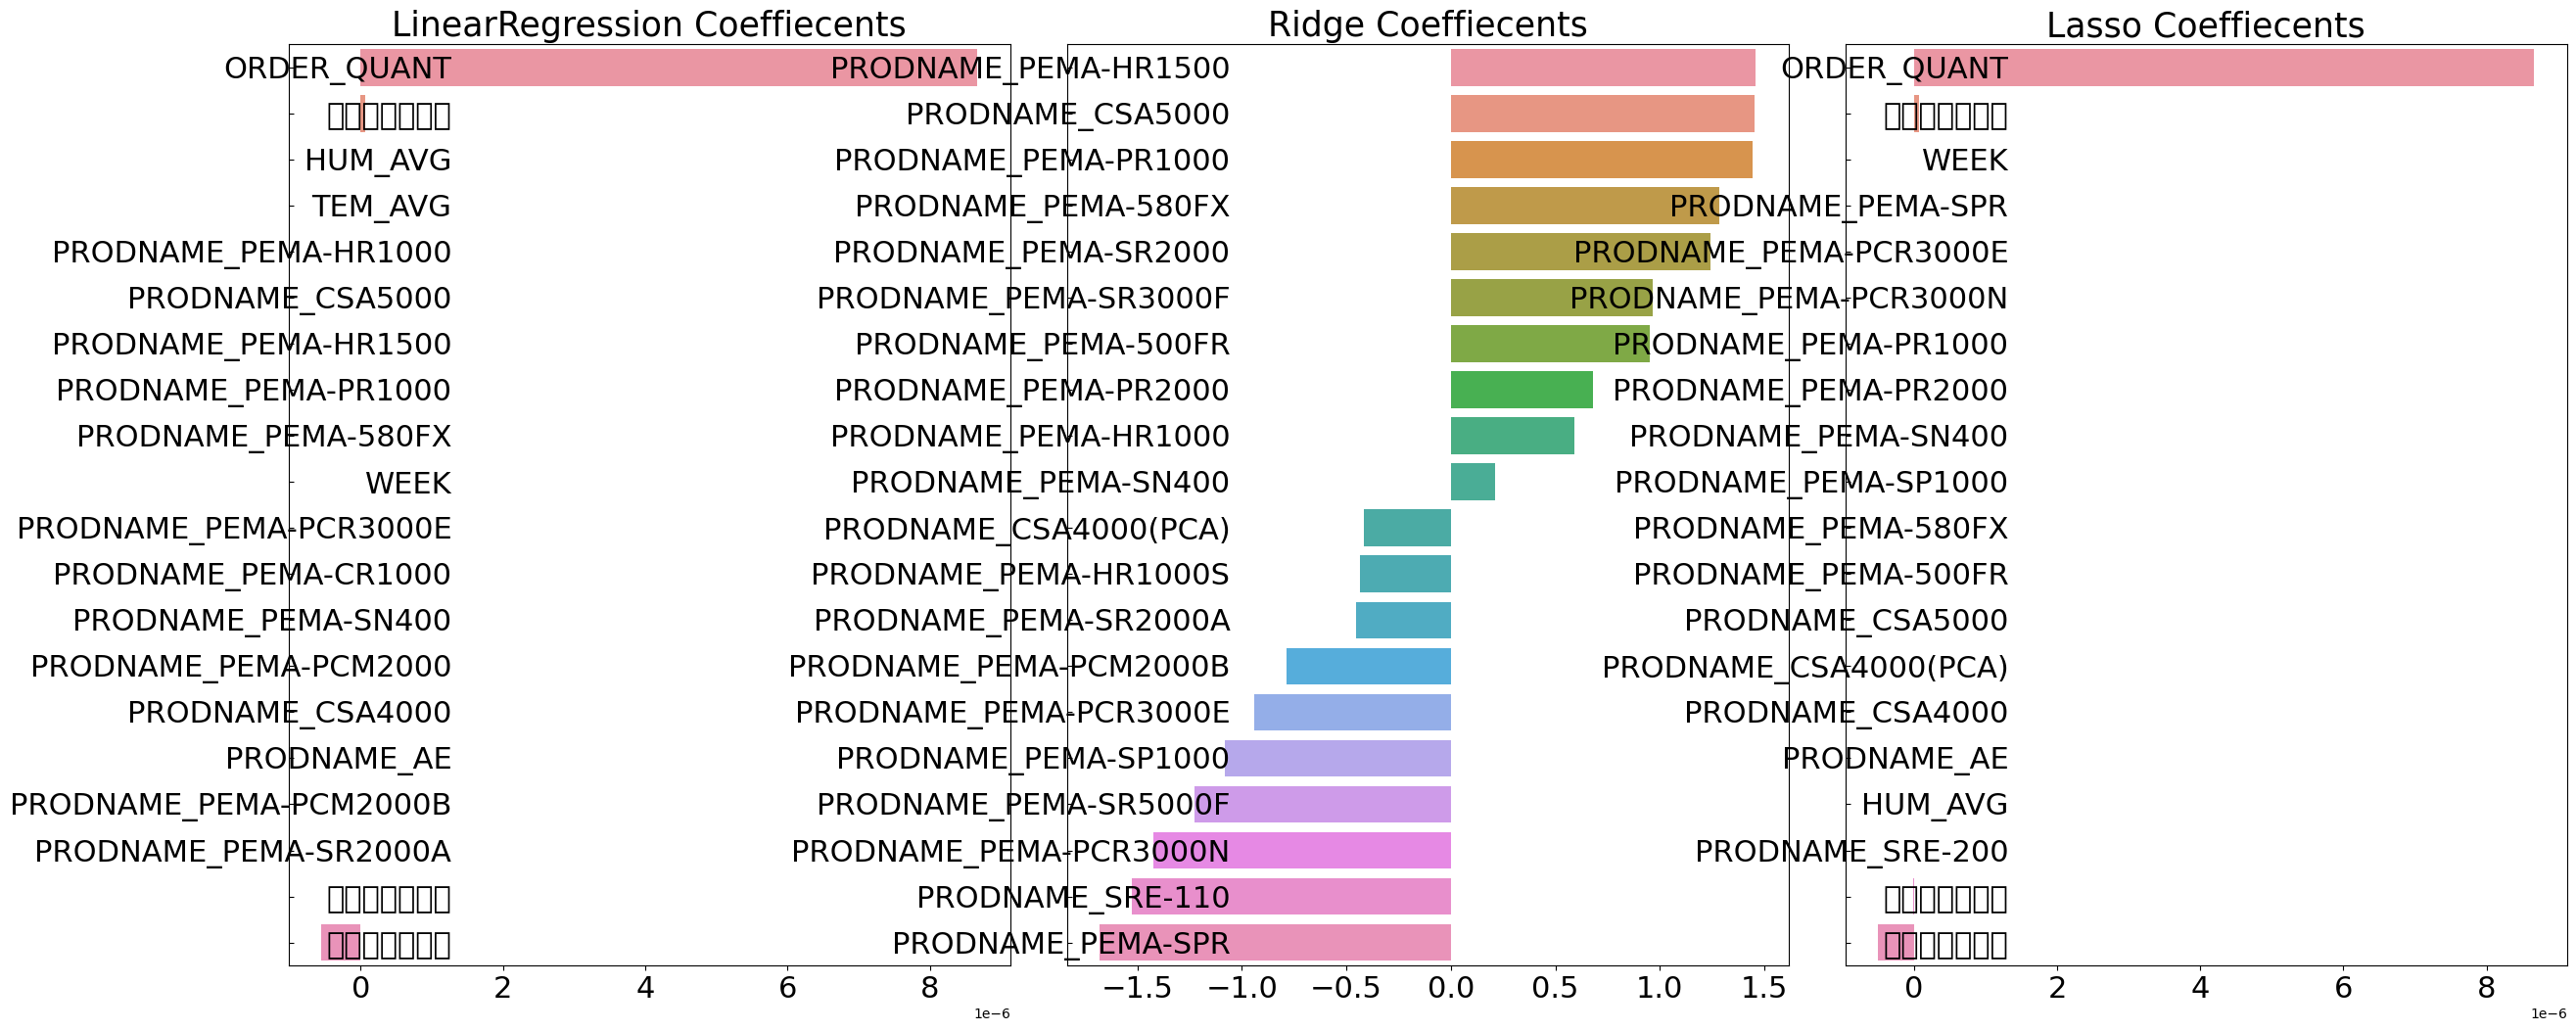

In [19]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout()
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화.
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합.
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정.
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

#lasso결과값이 나머지와 너무 상이하므로 개선이 필요하다.
#우선은 교차검증부터

In [20]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.861 0.849 0.871 0.851 0.86 ]
LinearRegression CV 평균 RMSE 값: 0.858

Ridge CV RMSE 값 리스트: [0.38  0.364 0.365 0.363 0.365]
Ridge CV 평균 RMSE 값: 0.367

Lasso CV RMSE 값 리스트: [0.86  0.849 0.871 0.851 0.86 ]
Lasso CV 평균 RMSE 값: 0.858


하이퍼 파라미터 튜닝

In [21]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.3673, 최적 alpha:{'alpha': 0.1}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.3676, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.826
Ridge 로그 변환된 RMSE: 0.396
Lasso 로그 변환된 RMSE: 0.37


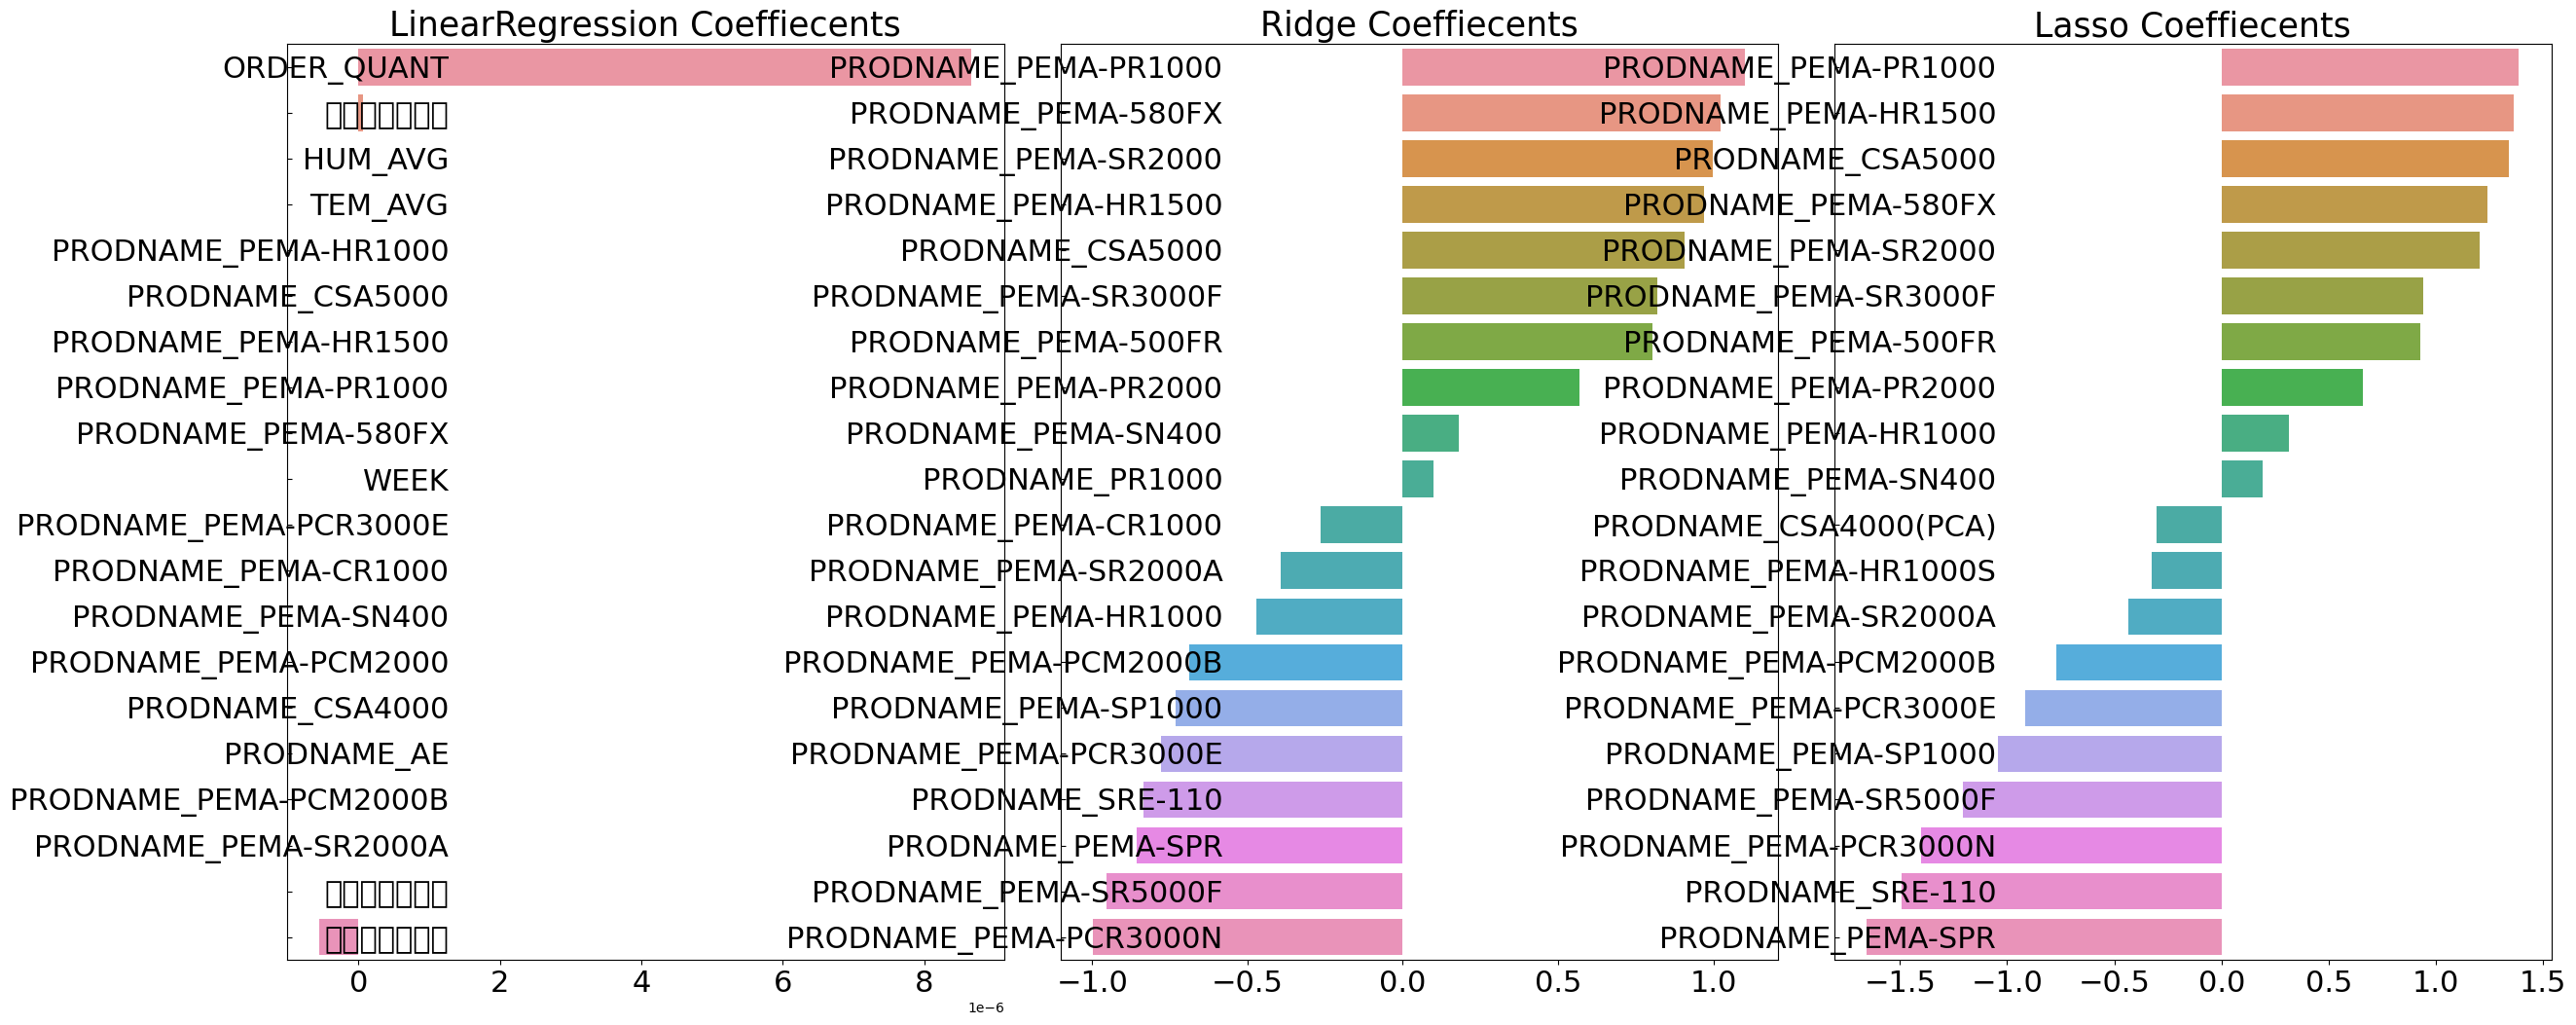

In [22]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

데이터 왜곡 로그 변환 후 성능 평가

In [23]:
from scipy.stats import skew

# object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
numeric_features = df.dtypes[df.dtypes != 'object'].index

# datetime 타입 칼럼 제외하기
numeric_features = numeric_features.drop(['WEEK'])

# df에 숫자형 칼럼 index를 [ ]로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew( ) 호출
skew_features = df[numeric_features].apply(lambda x: skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))


ORDER_QUANT    2.717671
국내건설수주액        1.204096
dtype: float64


In [24]:
df[skew_features_top.index] = np.log1p(df[skew_features_top.index])

In [25]:
# datetime 칼럼 제외하기
X_features = X_features.drop(['WEEK'], axis=1)

# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = {'alpha': [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha': [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)


Ridge 5 CV 시 최적 평균 RMSE 값: 0.366, 최적 alpha:{'alpha': 0.1}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.3659, 최적 alpha:{'alpha': 0.001}


In [26]:
# 테스트 데이터셋에서도 'WEEK' 피처를 제거
X_test = X_test.drop(['WEEK'], axis=1)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)


ValueError: ignored

In [ ]:

# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

이상치 제거

In [ ]:
import pandas as pd

# 데이터를 정상적으로 로드했는지 확인
print(ori_df.head())

# 'ORDER_QUANT'와 'SOLD_QUANT' 컬럼이 존재하는지 확인
print('ORDER_QUANT' in ori_df.columns)
print('SOLD_QUANT' in ori_df.columns)


In [ ]:
plt.scatter(x = ori_df['ORDER_QUANT'], y = ori_df['SOLD_QUANT'])
plt.ylabel('SOLD_QUANT', fontsize=15)
plt.xlabel('ORDER_QUANT', fontsize=15)
plt.show()

In [ ]:
plt.scatter(x=df[df['PRODNAME'] == 'PEMA-580FX']['PRODNAME'], y=df[df['PRODNAME'] == 'PEMA-580FX']['SOLD_QUANT'])
plt.ylabel('SOLD_QUANT', fontsize=15)
plt.xlabel('PRODNAME', fontsize=15)
plt.show()
